# Project: Investigation of TMDb Dataset 
#### This project are for below research:
<ul>
    <li>What is the distribution of vote score average?</li>
    <li>What is the distribution of popularity?</li>
    <li>How many percent of movies have homepage?</li>
    <li>Investigate revenue generating ability of actor/actress</li>
    <li>Investigate the genre porpularity over year</li>
</ul>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is dataset about TMDb Movies 

#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import islice
import operator

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('./data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
-	Remove duplicated row
-	Change the column ‘release_date’ datatype to datetime
-	Split the element of column ‘cast’, ‘production_companies’, ‘genres’, ‘director’ into list


#### Remove duplicate row

In [5]:
display(df[df.duplicated()])
df = df.drop_duplicates()
print(f"Row left: {df['id'].count()}")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Row left: 10865


#### Change the column ‘release_date’ datatype to datetime

In [6]:
print(f"Before: {type(df['release_date'][0])}")
df['release_date'] = pd.to_datetime(df['release_date'])
print(f"After: {type(df['release_date'][0])}")

Before: <class 'str'>
After: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Split the element of column ‘cast’, ‘production_companies’, ‘genres’, ‘director’ into list

In [7]:
def split_string_into_list(string):
    if (type(string) == str):
        splited_list = string.split('|')
    else:
        splited_list = None
    return splited_list

df['cast'] = df['cast'].apply(lambda cast: split_string_into_list(cast))
df['production_companies'] = df['production_companies'].apply(lambda company: split_string_into_list(company))
df['genres'] = df['genres'].apply(lambda company: split_string_into_list(company))
df['director'] = df['director'].apply(lambda company: split_string_into_list(company))
print(type(df['cast'][0]))
print(type(df['production_companies'][0]))
print(type(df['genres'][0]))
print(type(df['director'][0]))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


<a id='eda'></a>
## Exploratory Data Analysis


### What is the distribution of vote score average?

#### Plot Illustration

(array([0.00107578, 0.00513982, 0.02163506, 0.06275363, 0.21431859,
        0.41775987, 0.35177892, 0.19304212, 0.02976315, 0.00143437]),
 array([1.5 , 2.27, 3.04, 3.81, 4.58, 5.35, 6.12, 6.89, 7.66, 8.43, 9.2 ]),
 <a list of 10 Patch objects>)

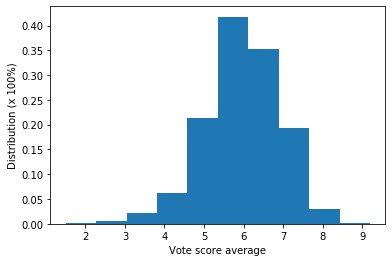

In [8]:
df0 = df.copy()
plt.xlabel('Vote score average')
plt.ylabel('Distribution (x 100%)')
plt.hist(df0['vote_average'], density=1) 

The vote score average is fall in a normal distribution with the mean of approximately 5.8

### What is the distribution of popularity?

#### Plot illustration

(array([2.97385854e-01, 4.68763591e-03, 7.81272652e-04, 1.95318163e-04,
        2.79025947e-05, 0.00000000e+00, 0.00000000e+00, 2.79025947e-05,
        2.79025947e-05, 2.79025947e-05]),
 array([6.50000000e-05, 3.29863480e+00, 6.59720460e+00, 9.89577440e+00,
        1.31943442e+01, 1.64929140e+01, 1.97914838e+01, 2.30900536e+01,
        2.63886234e+01, 2.96871932e+01, 3.29857630e+01]),
 <a list of 10 Patch objects>)

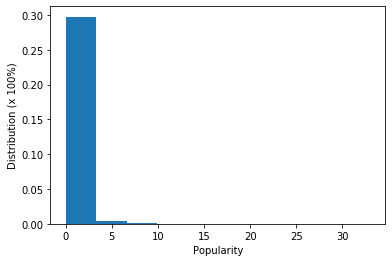

In [9]:
plt.xlabel('Popularity')
plt.ylabel('Distribution (x 100%)')
plt.hist(df0['popularity'], density=1) 

The graph shows most of the popularity is fell in between 0 to 2.5

### How many percent of movies have homepage?

#### Function declaration

In [10]:
has_homepage = {
    'yes': 0,
    'no': 0
}
def get_homepage_availablility(row):
    if type(row['homepage'] ) == str:
        has_homepage['yes'] += 1
    else:
        has_homepage['no'] += 1

#### Plot illustration

([<matplotlib.patches.Wedge at 0x23074996288>,
 [Text(0.7268583414762151, 0.8256373001666325, 'Yes'),
  Text(-0.7268582641744693, -0.8256373682200181, 'No')],
 [Text(0.3964681862597536, 0.4503476182727085, '27.0%'),
  Text(-0.396468144095165, -0.4503476553927371, '73.0%')])

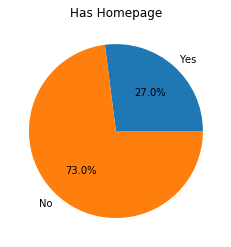

In [11]:
df0.apply(lambda row: get_homepage_availablility(row), axis=1)
plt.title("Has Homepage")
plt.pie(x=[has_homepage['yes'], has_homepage['no']], labels=['Yes', 'No'], autopct='%1.1f%%')

The chart shows there are only 27% of movies have homepage

### Investigate revenue generating ability of actor/actress

#### Function Declaration

In [12]:
cast_revenue = {}
def calculate_cast_revenue(row):
    if(row['cast'] != None):
        for cast in row['cast']:
            cast_revenue[cast] = cast_revenue.get(cast, 0) + row['revenue']
    else:
        cast_revenue['Unrecorded'] = cast_revenue.get('Unrecorded', 0) + row['revenue']

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

#### Calculate revenue for paticular cast
Calculate the total revenue of movie that casted by the particular actor/actress 

In [13]:
df1 = df.copy()
df1 = df1[['cast', 'revenue']]
df1.apply(lambda row: calculate_cast_revenue(row), axis=1)
cast_revenue = {k: v for k, v in sorted(cast_revenue.items(), key=lambda item: item[1], reverse= True)}

#### Plot Illustration (Top 10 revenue earning)

<BarContainer object of 10 artists>

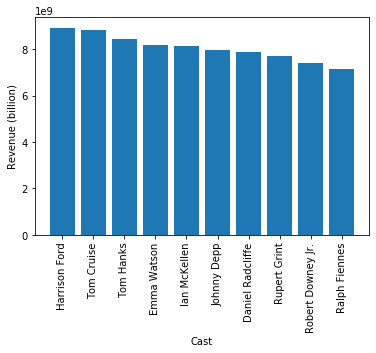

In [14]:
plt.xticks(rotation=90)
plt.xlabel('Cast')
plt.ylabel('Revenue (billion)')
plt.bar(take(10, cast_revenue.keys()), take(10, cast_revenue.values()))

In summary, the most earning actor is Harrison Ford over the years which is more than 9 billions then followed by Tom Cruise, Tom Hanks, Emma Watson, Ian McKellen, Johnny Depp, Daniel Radcliffe, Rupert Grint, Robert Downey Jr., Ralph Fiennes.

### Investigate the genre porpularity over year

#### Function Declaration

In [15]:
genre_count_year = {}
def count_genre(row):
    if(row['genres'] != None):
        for genre in row['genres']:
            if genre in genre_count_year:
                genre_count_year[genre][row['release_year']] = genre_count_year[genre].get(row['release_year'], 0) + 1
            else:
                genre_count_year[genre] = {row['release_year']: 1}
    else:
        if 'Unrecorded' in genre_count_year:
            genre_count_year['Unrecorded'][row['release_year']] = genre_count_year['Unrecorded'].get(row['release_year'], 0) + 1
        else:
            genre_count_year['Unrecorded'] = {row['release_year']: 1}

#### Calculate genre popularity over year
Calculate the number of movies that contain the genre over years.

In [16]:
df2 = df.copy()
df2 = df2[['genres','release_year']]
df2.apply(lambda row: count_genre(row), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
10861    None
10862    None
10863    None
10864    None
10865    None
Length: 10865, dtype: object

#### Plot Illustration

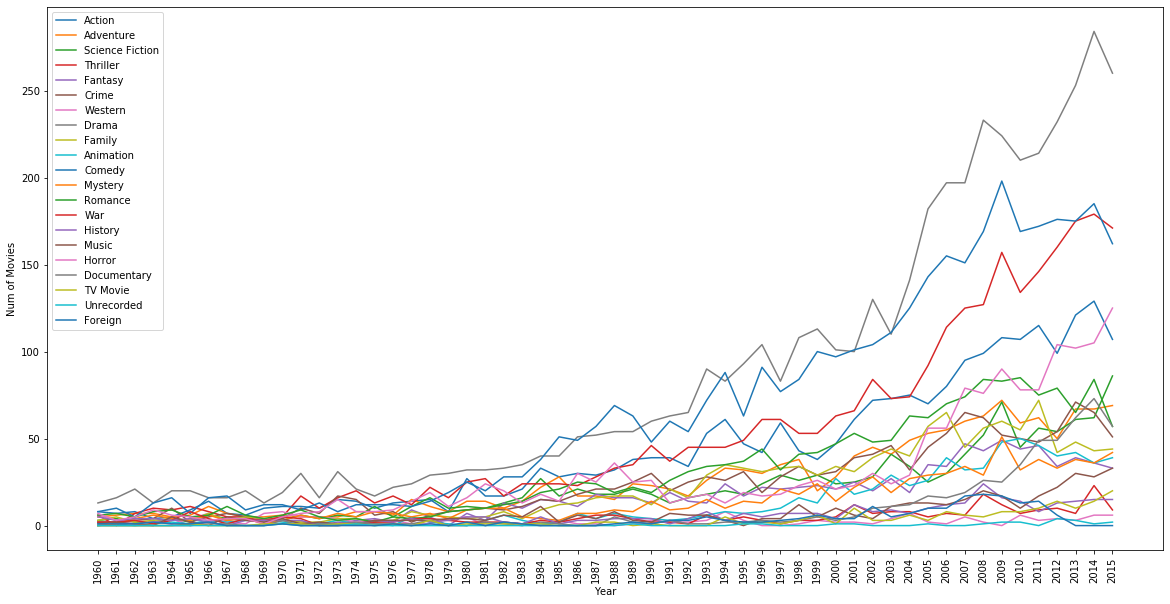

In [17]:
unique_release_year = df2['release_year'].unique()
unique_release_year.sort()
unique_genres = genre_count_year.keys()

plt.figure(figsize=(20,10)) 
for genre in unique_genres:
    y = []
    for year in unique_release_year:
        if(year in genre_count_year[genre].keys()):
            y.append(genre_count_year[genre][year])
        else:
            y.append(0)
    plt.plot(unique_release_year, y, label=genre)
    
plt.xlabel('Year')
plt.ylabel('Num of Movies')
plt.xticks(unique_release_year, rotation=90)
plt.legend()

Drame genre was the most popular genre which was mostly in the top rank over the year. However, Drama genre had the same popularity with comedy genre on year 1963 and 1966, and it was being passed by comedy genre on 1967, 1985, 1987, 1988, 1989, 1994, 2001 and 2003.

<a id='conclusions'></a>
## Conclusions
In summary, this project has investigate about the distribution of vote average, distribution of popularity, percentage of homepage availability, ranking of actor revenue generating ability and genre popularity over years. The investigation was showing in different types of illustration and combined multiple types of data from the dataset given.

## Limitations
The limitation of this project is there are some unrecorded data which would affect the result of the investigation. For example there are some of the records from the dataset do not have the cast. However this investigation could be an assumption with the current available data.